# «Стримчик»: анализ и проверка гипотез

«Стримчик»: анализ и проверка гипотез

Данный проект подразумевает проведение анализа данных интернет-магазина компьютерных игр с последующим поиском ответов на интересующие заказчика вопросы.

Цель проекта заключается в поиске закономерностей, опредлеяющих успешность игры, а также проверке двух гипотез:

"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?"

Предоставленные для исследования данные содержат информацию о продажах компьютерных игра в разрезе: жанров, платформ, регионов.

План работы:

Загрузка и предобработка данных (Деление на подразделы осуществляется в соответсвии с выполняемыми по операциями)

Описание и визуализация данных (Деление на подразделы осуществляется в соответсвии с выполняемыми по операциями)

Поиск ответов на поставленные перед исследованием вопросы (Деление на подразделы осуществляется в соответсвии с выполняемыми по операциями)

Формулирование общего вывода по исследованию

## Загрузка и предобработка данных

### Импортируемые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import numpy as np

### Загрузка и общее описание данных

Импортирую библиотеку pandas. Считываю данные из csv-файла в датафрейм и сохраняю в переменную games

In [2]:
games = pd.read_csv('/datasets/games.csv')

Вывожу первые строки набора данных. Изучаю общую информацию.

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сведения о содержании:

Name — название игры (тип данных не меняем)

Platform — платформа (тип данных не меняем)

Year_of_Release — год выпуска (тип данных вещественные числа, заменяем на целочисленный)

Genre — жанр игры (тип данных не меняем)

NA_sales — продажи в Северной Америке (тип данных не меняем)

EU_sales — продажи в Европе (тип данных не меняем)

JP_sales — продажи в Японии (тип данных не меняем)

Other_sales — продажи в других странах (тип данных не меняем)

Critic_Score — оценка критиков (максимум 100) (тип данных вещественные числа, заменяем на целочисленный)

User_Score — оценка пользователей (тип данных меняем на вещественно числовой)

Rating — рейтинг от организации ESRB (тип данных не меняем)

### Подготовка данных

#### Замена названий столбцов

In [5]:
games.columns = map(str.lower, games.columns)

#### Преобразование типов данных

Меняю формат в датафрейме games столбца year_of_release на формат целого числа, поскольку речь идет о годе выпуска

In [6]:
games['year_of_release'] =  pd.to_numeric(games['year_of_release'], downcast='integer')

Меняю формат в датафрейме games столбца critic_score на формат целого числа, поскольку речь идет ою оценках, данных по 100 бальной системе с целыми значениями

In [7]:
games['critic_score'] =  pd.to_numeric(games['critic_score'], downcast='integer')

Меняю формат в датафрейме games столбца user_score на формат вещественного числа, поскольку речь идет о выставляемой пользователми оценке по 10-бальной шкале c дробными значениями

Предварительно: в столбце встречается аббревиатура "TDB", то есть  — To Be Determined ("Будет определено") Вероятно, для данных игр еще не был сформирован пользовательский рейтинг. Данное значение стоит заменить на Nan, поскольку истинной реакции игроков еще не выявлено. 

Изменение формата будет выполнено после соответствующей замены

In [8]:
games['user_score'] =  pd.to_numeric(games['user_score'], downcast='float', errors ='coerce')

Проверяю изменения

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


Столбец critic_score не переведен в нужный тип из-за наличия пропусков.

#### Обработка пропусков

In [10]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры, названия которых неизвестны, но они были выпусщены на одной платформе и в один год; в первой игре известны значения продаж в Северной Америке и Европе, для второй - в Японии. 

Вероятно, это одна и та же игра. Однако, из-за пропусков в названии и оценках от данных строк стоит избавиться. 

In [11]:
games.drop([659, 14244],inplace=True)

Проверяю пропуски в иных столбцах

In [12]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Оценка игр весьма субъективная, поэтому пропуски NaN в столбцах critic_score, user_score, rating не могут быть заменены на медианные или средние. Эти пропуски невозможно восстановить или удалить

In [17]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Некоторые года реализации игры восстановить можно, используя сведения из названия игр. Относительно спортивных игр стоит понимать, что указанный в названии год означает конец игрового сезона. Значит, игра была реализована годом ранее - в начале игрового сезона. 

Игры без известного года реализации для последующего анализа не нужны, данные сроки будут удалены

In [18]:
nan_year_of_release = games[games['year_of_release'].isna()]

In [19]:
display(nan_year_of_release.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [20]:
def fill_year(row):
    year = 0
    last_word = ''
    genre = row[3]
    for word in row[0].split():
        try:
            last_word = word
            year = int(word)
        except:
            continue
    if genre in ('Sports', 'Racing', 'Fighting'):
        if year > 2000 or last_word in ('2K6','2K8'):
            if genre == 'Sports':
                year -=1
            if last_word == '2K6':
                year = 2005
            elif last_word == '2K8':
                year = 2007
            if year < 2017 and np.isnan(row[2]):
                row[2] = year
    return row

games = games.apply(fill_year, axis=1)

In [21]:
games.drop(games[games['year_of_release'].isna()].index, inplace=True)

In [22]:
games['year_of_release'] =  pd.to_numeric(games['year_of_release'], downcast='integer')

In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int16  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7997 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           9781 non-null   object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


Удаляю явные дупликаты

In [24]:
games.drop_duplicates()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Расчет суммарного объема продаж во всех регионах

In [25]:
games['all_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

In [26]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


В ходе предобработки данных были изменены типы данных в столбцах Year_of_Release (с вещественного на целочисленный), Critic_Score ( с вещественного на целочисленный), User_Score (с общего на вещественно числовой).

Оценка игр весьма субъективная, поэтому пропуски NaN в столбцах critic_score, user_score, rating не могут быть заменены на медианные или средние. Эти пропуски невозможно восстановить или удалить.

Восстановление отсутствующих значений в year_of_release выполнено благодаря сведениям из названия игр.

## Исследовательский анализ данных

### Исследование объемов выпуска игр в разные годы

Для исследования объемов продаж игр по годам сформирую сводную таблицу. 

In [27]:
sales_volume_by_year = games.pivot_table(index = 'year_of_release', values='all_sales', aggfunc='count' )
sales_volume_by_year.columns = ['games_count']
display(sales_volume_by_year)

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


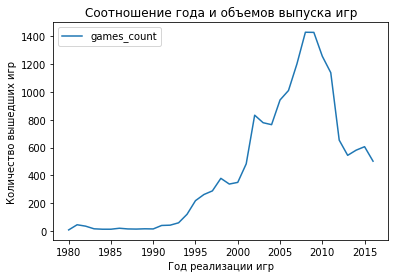

In [28]:
sales_volume_by_year.plot()
plt.xlabel('Год реализации игр')
plt.ylabel('Количество вышедших игр')
plt.title('Соотношение года и объемов выпуска игр')
plt.legend()
plt.show()

Для анализа важны не все предоставленные данные: до 1995 года динамика объемов выпуска игр была относительно стабильной, поэтому сведения до данного периода могут быть исключены из анализа.

Популярность игр возросла после 1995 года, небольшие спады количества выпускаемых игр в ~2000 и ~2005 годах может объясняться экономическими причиами: 10 марта 2000 года "лопнул" пузырь доткомов, образовавшийся ранее в результате взлёта акций интернет-компаний и достигший своего конца к указанному сроку; последствия пузыря растянулись до 2005 года. 

Спад в ~2010 году объхясняется Мировым экономическим кризисом (2008-2013 года), сказавшемся на многих отраслях деятнльости, в  том числе на производстве компьютерных игр. 

### Исследование изменений объемов продаж по платформам

In [29]:
sales_volume_by_platform = games.pivot_table(index = ('platform'), values='all_sales', aggfunc='sum' )
sales_volume_by_platform.columns = ['all_sales']
display(sales_volume_by_platform.sort_values(by='all_sales', ascending=False).head(5))

,all_sales
platform,
PS2,1247.53
X360,961.30
PS3,931.34
Wii,891.18
DS,802.79


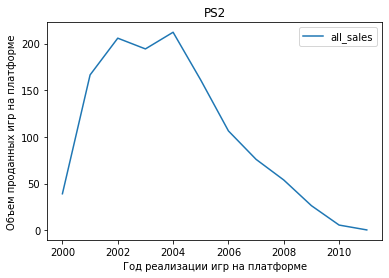

In [30]:
sales_volume_by_platform_PS2 = pd.pivot_table(games.query('platform == "PS2"'), index=['year_of_release'], values='all_sales', aggfunc='sum')
sales_volume_by_platform_PS2.plot()
plt.xlabel('Год реализации игр на платформе')
plt.ylabel('Объем проданных игр на платформе')
plt.title('PS2')
plt.legend()
plt.show()

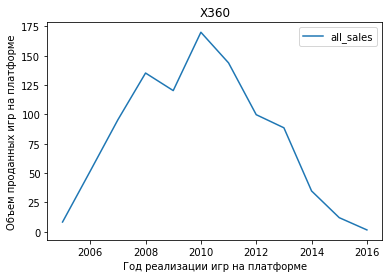

In [31]:
sales_volume_by_platform_X360 = pd.pivot_table(games.query('platform == "X360"'), index=['year_of_release'], values='all_sales', aggfunc='sum')
sales_volume_by_platform_X360.plot()
plt.xlabel('Год реализации игр на платформе')
plt.ylabel('Объем проданных игр на платформе')
plt.title('X360')
plt.legend()
plt.show()

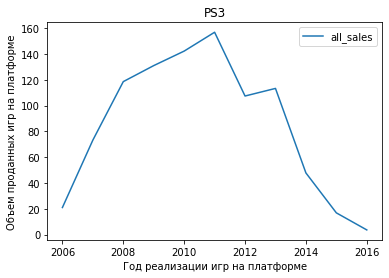

In [32]:
sales_volume_by_platform_PS3 = pd.pivot_table(games.query('platform == "PS3"'), index=['year_of_release'], values='all_sales', aggfunc='sum')
sales_volume_by_platform_PS3.plot()
plt.xlabel('Год реализации игр на платформе')
plt.ylabel('Объем проданных игр на платформе')
plt.title('PS3')
plt.legend()
plt.show()

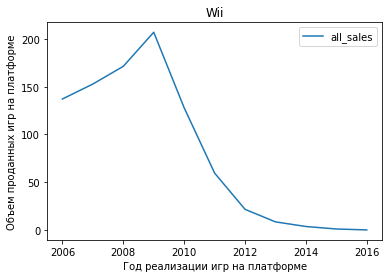

In [33]:
sales_volume_by_platform_Wii = pd.pivot_table(games.query('platform == "Wii"'),
                                              index=['year_of_release'], 
                                              values='all_sales', 
                                              aggfunc='sum')
sales_volume_by_platform_Wii.plot()
plt.xlabel('Год реализации игр на платформе')
plt.ylabel('Объем проданных игр на платформе')
plt.title('Wii')
plt.legend()
plt.show()

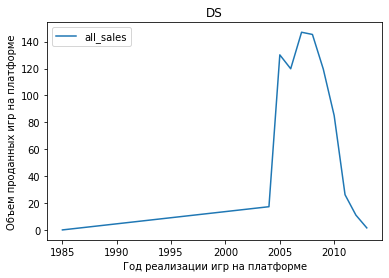

In [34]:
sales_volume_by_platform_DS = pd.pivot_table(games.query('platform == "DS"'), index=['year_of_release'], values='all_sales', aggfunc='sum')
sales_volume_by_platform_DS.plot()
plt.xlabel('Год реализации игр на платформе')
plt.ylabel('Объем проданных игр на платформе')
plt.title('DS')
plt.legend()
plt.show()

Исходя из проведенного анализа ТОП-5 платформ с самыми большими объемами продаж видно, что в среднем срок использования составляет примерно 10 лет

Говоря об актуальном периоде для данных, которые в последствии могут быть использованы для построения прогноза для 2017 года, я бы его определелила так: с 2013 по 2016 года.  Поскольку именно в 2013 году Мировой экономический кризис сменился экономическим подъёмом. А исходя из среднего срока производства игра - от 2 до 4 лет - пик продаж игр, разработка которых началась после Мировго кризиса, придется на 2017 год. 

In [35]:
best_sales_volume = pd.pivot_table(games.query('year_of_release > 2012'), 
                                   index=['platform', 'year_of_release'], 
                                   values='all_sales', 
                                   aggfunc='sum')
best_sales_volume.columns = ['all_sales']
display(best_sales_volume)

all_sales
platform year_of_release           
3DS      2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14
DS       2013                  1.54
PC       2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25
PSP      2013                  3.14
         2014                  0.24
         2015                  0.12
PSV      2013                 10.59
         2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2013                 21.65
         2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

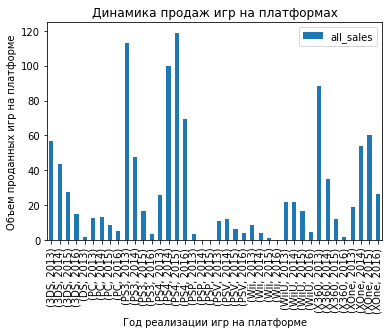

In [36]:
best_sales_volume.plot(kind='bar')
plt.xlabel('Год реализации игр на платформе')
plt.ylabel('Объем проданных игр на платформе')
plt.title('Динамика продаж игр на платформах')
plt.legend()
plt.show()

Лидируют по продажам в 2016 году: PS4, XOne, WiiU, 3DS. Исходя из общей динамики, данные платформы считаю потенциально прибыльными	

Падают по продажам: DS, PC, PS3, PSP, Wii, X360, поскольку это устаревающие можели приставок. Соответвенно, им на смену приходят новые модели, продажи у которых увеличиваются: PS4, XOne, 3DS, WiiU и PSV

### Исследование глобльных продаж по платформам

В исследовании будут принимать участие потенциально прибыльные платформы, для кототрых представлены данные за 2013 - 2016 год. 

#### Исследование глобльных продаж PS4

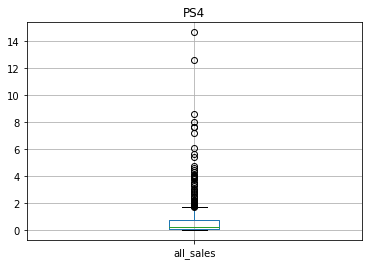

,all_sales
count,392.000000
mean,0.801378
std,1.609456
min,0.010000
25%,0.060000
50%,0.200000
75%,0.730000
max,14.630000


In [37]:
sales_volume_PS4 = pd.pivot_table(games.query('platform == "PS4" and year_of_release > 2012'),
                                  index = 'name', 
                                  values= 'all_sales', 
                                  aggfunc= 'sum')
sales_volume_PS4.boxplot(column = 'all_sales')
plt.title('PS4')
plt.show()

sales_volume_PS4.describe()

Исследование глобальных продаж PS4 показывает, что средний объем продаж за период 2013-2016 гг. составляет 0,80 млн. проданных копий. 
Макисмально было реализовано 14.6 млн. копий

#### Исследование глобльных продаж XOne


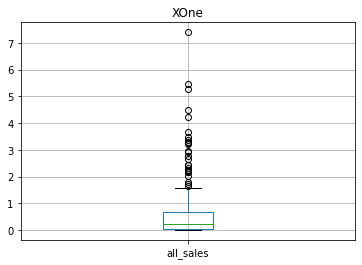

,all_sales
count,247.000000
mean,0.645020
std,1.036139
min,0.010000
25%,0.060000
50%,0.220000
75%,0.685000
max,7.390000


In [38]:
sales_volume_XOne = pd.pivot_table(games.query('platform == "XOne" and year_of_release > 2012'),
                                  index = 'name', 
                                  values= 'all_sales', 
                                  aggfunc= 'sum')
sales_volume_XOne.boxplot(column = 'all_sales')
plt.title('XOne')
plt.show()
sales_volume_XOne.describe()

Исследование глобальных продаж XOne показывает, что средний объем продаж за период 2013-2016 гг. составляет 0,64 млн. проданных копий. 
Макисмально было реализовано 7,3 млн. копий

#### Исследование глобльных продаж WiiU

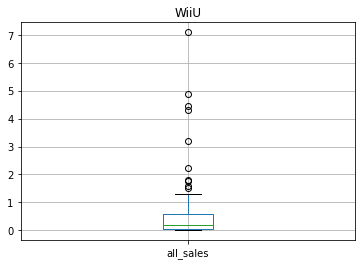

,all_sales
count,115.000000
mean,0.562000
std,1.038778
min,0.010000
25%,0.060000
50%,0.200000
75%,0.595000
max,7.090000


In [39]:
sales_volume_WiiU = pd.pivot_table(games.query('platform == "WiiU" and year_of_release > 2012'),
                                  index = 'name', 
                                  values= 'all_sales', 
                                  aggfunc= 'sum')
sales_volume_WiiU.boxplot(column = 'all_sales')
plt.title('WiiU')
plt.show()
sales_volume_WiiU.describe()

Исследование глобальных продаж WiiU показывает, что средний объем продаж за период 2013-2016 гг. составляет 0,56 млн. проданных копий. 
Макисмально было реализовано 7,09 млн. копий

#### Исследование глобльных продаж 3DS

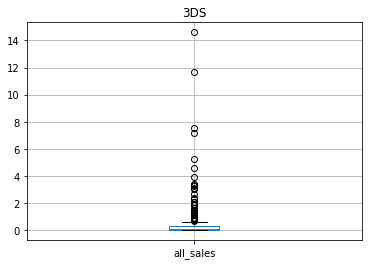

,all_sales
count,303.000000
mean,0.472772
std,1.381347
min,0.010000
25%,0.040000
50%,0.090000
75%,0.280000
max,14.600000


In [40]:
sales_volume_3DS = pd.pivot_table(games.query('platform == "3DS" and year_of_release > 2012'),
                                  index = 'name', 
                                  values= 'all_sales', 
                                  aggfunc= 'sum')
sales_volume_3DS.boxplot(column = 'all_sales')
plt.title('3DS')
plt.show()
sales_volume_3DS.describe()

Исследование глобальных продаж 3DS показывает, что средний объем продаж за период 2013-2016 гг. составляет 0,47 млн. проданных копий. 
Макисмально было реализовано 14,6 млн. копий

Для PS4 и 3DS видна положительная тенденция к росту продаж. 

Средняя больше 3го квартиля, то есть средняя объема продаж располагается после 75% продаж, что свидетельствует о хорошей динамике и устойчивой популярности у пользователей

У XOne и WiiU средняя расположена между 2 и 3 квартилями, они уступают в популярности, но тем не менее демонстрируют хоршие показатели

### Исследование влияния отзывов пользователеей и критиков на объем продаж внутри платформ

#### Исследование влияния отзывов пользователеей и критиков на объем продаж внутри PS4

In [41]:
crit_and_sales_PS4 = games.query('platform == "PS4" and year_of_release > 2012')
crit_and_sales_ratings_PS4 = crit_and_sales_PS4.loc[:,['all_sales', 'critic_score', 'user_score']]
display(crit_and_sales_ratings_PS4.head())

,all_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [42]:
crit_and_sales_ratings_PS4.corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


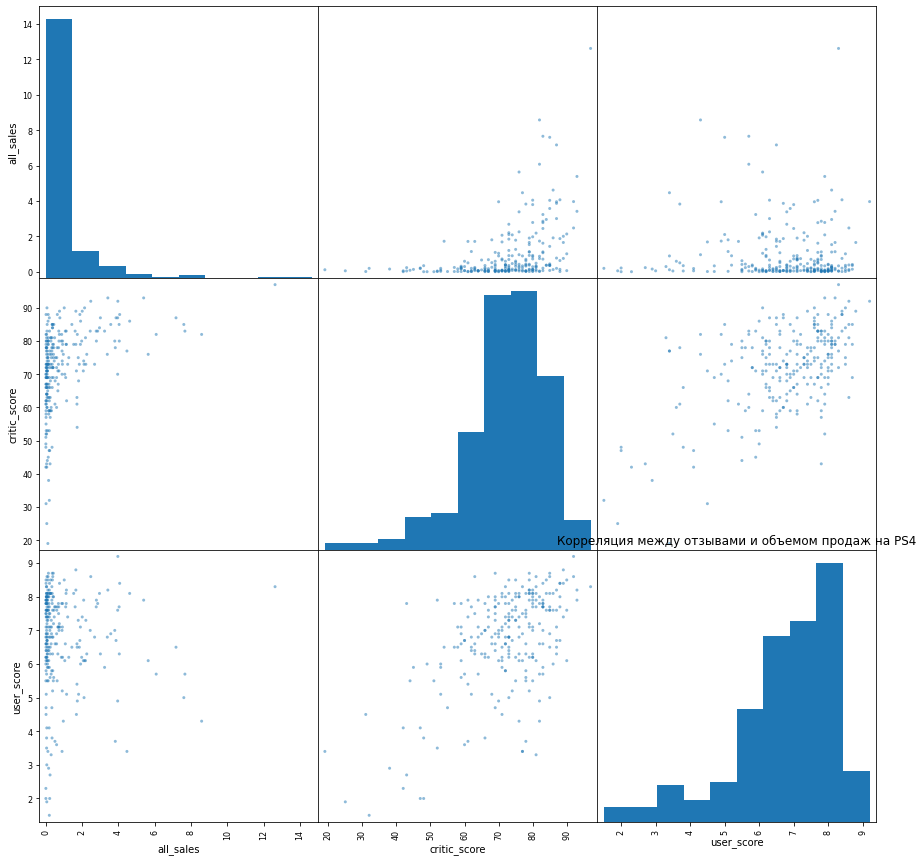

In [43]:
pd.plotting.scatter_matrix(crit_and_sales_ratings_PS4, figsize=(15, 15))
plt.title('Корреляция между отзывами и объемом продаж на PS4')
plt.show()

Вывод: 

зависимость объема продаж на PS4 от отзывов критиков оценивается как умеренная положительная;

зависимость объема продаж на PS4 от отзывов пользователей оценивается как слабая отрицательная, тогда как зависимость мнения игроков от мнения критиков оценивается как умеренная положительная. 

То есть, чем выше рейтинг, данный критиками, тем выше рейтинг, данный игроками, и объем продаж. 

Исследую остальные платформы

#### Исследование влияния отзывов пользователеей и критиков на объем продаж внутри 3DS

,all_sales,critic_score,user_score
all_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


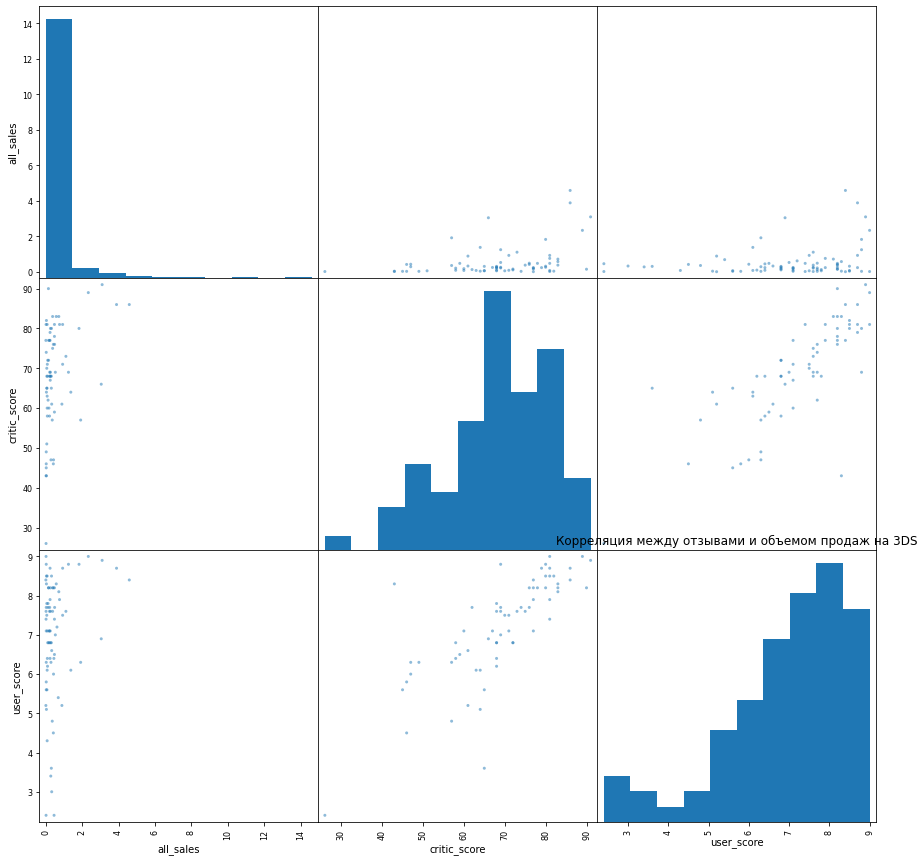

In [44]:
crit_and_sales_3DS = games.query('platform == "3DS" and year_of_release > 2012')
crit_and_sales_ratings_3DS = crit_and_sales_3DS.loc[:,['all_sales', 'critic_score', 'user_score']]

display(crit_and_sales_ratings_3DS.corr())

pd.plotting.scatter_matrix(crit_and_sales_ratings_3DS, figsize=(15, 15))
plt.title('Корреляция между отзывами и объемом продаж на 3DS')
plt.show()

Вывод:

зависимость объема продаж на 3DS от отзывов критиков оценивается как умеренная положительная;

зависимость объема продаж на 3DS от отзывов пользователей оценивается как слабая положительная, тогда как зависимость мнения игроков от мнения критиков оценивается как сильная положительная.

То есть, чем выше рейтинг, данный критиками, тем выше рейтинг, данный игроками, и объем продаж.

#### Исследование влияния отзывов пользователеей и критиков на объем продаж внутри XOne

,all_sales,critic_score,user_score
all_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


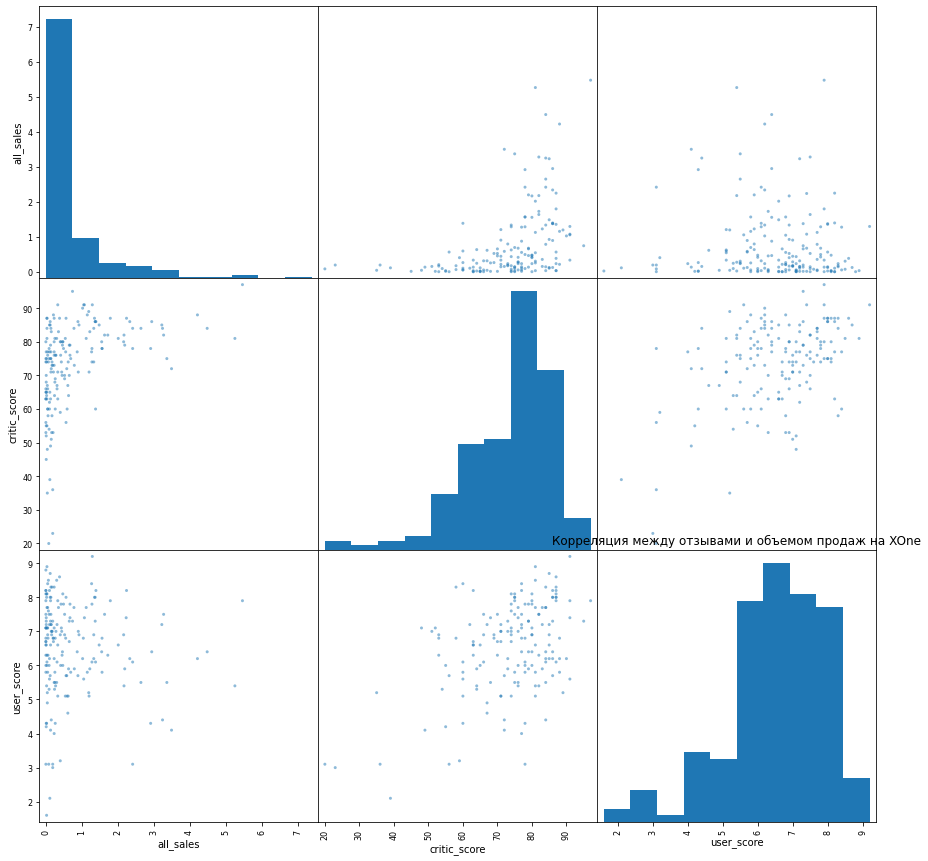

In [45]:
crit_and_sales_XOne = games.query('platform == "XOne" and year_of_release > 2012')
crit_and_sales_ratings_XOne = crit_and_sales_XOne.loc[:,['all_sales', 'critic_score', 'user_score']]

display(crit_and_sales_ratings_XOne.corr())

pd.plotting.scatter_matrix(crit_and_sales_ratings_XOne, figsize=(15, 15))
plt.title('Корреляция между отзывами и объемом продаж на XOne')
plt.show()

Вывод:

зависимость объема продаж на XOne от отзывов критиков оценивается как умеренная положительная;

зависимость объема продаж на XOne от отзывов пользователей оценивается как слабая отрицательная, тогда как зависимость мнения игроков от мнения критиков оценивается как умеренная положительная.

То есть, чем выше рейтинг, данный критиками, тем выше рейтинг, данный игроками, и объем продаж.

#### Исследование влияния отзывов пользователеей и критиков на объем продаж внутри WiiU

,all_sales,critic_score,user_score
all_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


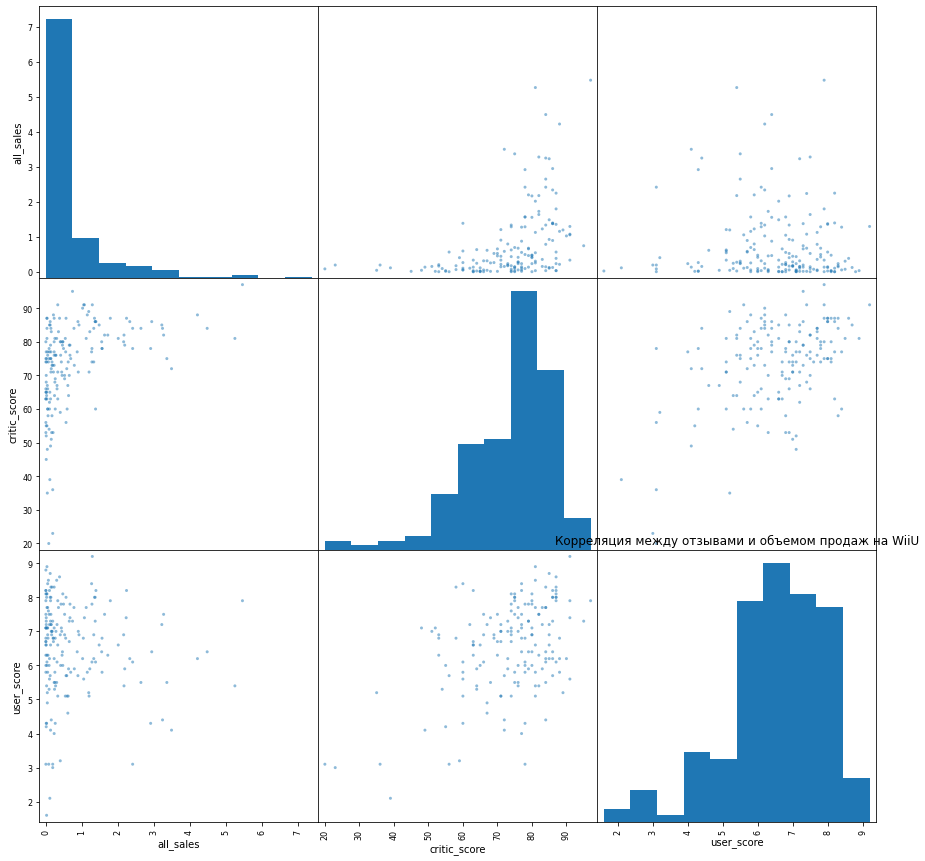

In [46]:
crit_and_sales_WiiU = games.query('platform == "WiiU" and year_of_release > 2012')
crit_and_sales_ratings_WiiU = crit_and_sales_XOne.loc[:,['all_sales', 'critic_score', 'user_score']]

display(crit_and_sales_ratings_WiiU.corr())

pd.plotting.scatter_matrix(crit_and_sales_ratings_WiiU, figsize=(15, 15))
plt.title('Корреляция между отзывами и объемом продаж на WiiU')
plt.show()

Вывод:

зависимость объема продаж на WiiU от отзывов критиков оценивается как умеренная положительная;

зависимость объема продаж на WiiU от отзывов пользователей оценивается как слабая отрицательная, тогда как зависимость мнения игроков от мнения критиков оценивается как умеренная положительная.

То есть, чем выше рейтинг, данный критиками, тем выше рейтинг, данный игроками, и объем продаж.

Платформы PS4, XOne и WiiU имеют похожие связи. 
Иная ситуация у 3DS, где полоджительный характер связи замечем как при корреляции с рейтингом критиков, так и при корреляции с рейтингом игроков. Возможно, а данной платформе лучше поставлена работа именно по сбору обратной связи с игроками, а не только с критиками. 

### Исследование жанрового распределения

In [47]:
sales_volume_by_genre = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'genre', 
                                       values='all_sales', 
                                       aggfunc='sum' )
sales_volume_by_genre.columns = ['all_sales']
display(sales_volume_by_genre.sort_values(by='all_sales', ascending=False))

,all_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Самыми прибыльными жанрами по итоговому объему продаж можно считать экшен(Action), шутеры(Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing).

На период 2013-2016 год не пользуются популярностью приключения (Adventure), симуляторы(Simulation) стратегии реального времени или пошаговые (Strategy) и головоломки (Puzzle).

In [48]:
sales_volume_by_genre = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'genre', 
                                       values='all_sales', 
                                       aggfunc='median' )
sales_volume_by_genre.columns = ['all_sales']
display(sales_volume_by_genre.sort_values(by='all_sales', ascending=False))

,all_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


В среднем же, самыми прибыльными жанжами шутеры(Shooter), спортивные (Sports) и платформенные (Platform) игры

На период 2013-2016 год не пользуются популярностью приключения (Adventure), стратегии (Strategy) и головоломки (Puzzle).

## Описание и визуализация по регионам

### Определение ТОП-5 самых популярных платформ для пользователя каждого региона 

#### Определение ТОП-5 самых популярных платформ для Северной Америки 

In [49]:
sales_volume_na = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'platform', 
                                       values='na_sales', 
                                       aggfunc='sum' )
sales_volume_na.columns = ['na_sales']
display(sales_volume_na.sort_values(by='na_sales', ascending=False).head())

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


#### Определение ТОП-5 самых популярных платформ для Европы

In [50]:
sales_volume_eu = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'platform', 
                                       values='eu_sales', 
                                       aggfunc='sum' )
sales_volume_eu.columns = ['eu_sales']
display(sales_volume_eu.sort_values(by='eu_sales', ascending=False).head())

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


#### Определение ТОП-5 самых популярных платформ для Японии

In [51]:
sales_volume_jp = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'platform', 
                                       values='jp_sales', 
                                       aggfunc='sum' )
sales_volume_jp.columns = ['jp_sales']
display(sales_volume_jp.sort_values(by='jp_sales', ascending=False).head())

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Рейтинг платформ:

Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS

Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS

Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU

Популярность PS4, PSV и PS3 обусловлена широкой распространенностью продукции компании Sony Interactive Entertainment (Сан-Матео, США), которая является дочерней компанией для Sony Group Corporation (Токио, Япония)

Популярность XOne и X360 в Америке обусловлена их принадлежностью компании Microsoft. В Японии похожее положение занимает компания Nintendo c двумя продуктами 3DS и WiiU. 

Европа не имеет собственных разработчиков игр. 

### Определение ТОП-5 самых популярных жанров для пользователя каждого региона 

#### Определение ТОП-5 самых популярных жанров для Северной Америки 

In [52]:
sales_genre_na = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'genre', 
                                       values='na_sales', 
                                       aggfunc='sum' )
sales_genre_na.columns = ['na_sales']
display(sales_genre_na.sort_values(by='na_sales', ascending=False).head())

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


#### Определение ТОП-5 самых популярных жанров для Европы

In [53]:
sales_genre_eu = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'genre', 
                                       values='eu_sales', 
                                       aggfunc='sum' )
sales_genre_eu.columns = ['eu_sales']
display(sales_genre_eu.sort_values(by='eu_sales', ascending=False).head())

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


#### Определение ТОП-5 самых популярных жанров для Японии 

In [54]:
sales_genre_jp = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'genre', 
                                       values='jp_sales', 
                                       aggfunc='sum' )
sales_genre_jp.columns = ['jp_sales']
display(sales_genre_jp.sort_values(by='jp_sales', ascending=False).head())

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


Рейтинг жанров:

Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing, Misc

Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing

Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter

Американские и европейские игроки имеют схожите тенденции по жанрам в целом. Японские отличаются от них большим вкладом в игры с ролевым сюжетом и играм в категории skill-and-action. 

Однако, вне зависимости от региона всегда будут популярны игры экшен и шутеры.

### Определение влияния рейтинга ESRB на продажи в отдельном регионе

#### Определение влияния рейтинга ESRB на продажи в Северной Америке

In [55]:
sales_esrb_na = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'rating', 
                                       values='na_sales', 
                                       aggfunc='sum' )
sales_esrb_na.columns = ['na_sales']
display(sales_esrb_na.sort_values(by='na_sales', ascending=False))

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


#### Определение влияния рейтинга ESRB на продажи в Европе

In [56]:
sales_esrb_eu = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'rating', 
                                       values='eu_sales', 
                                       aggfunc='sum' )
sales_esrb_eu.columns = ['eu_sales']
display(sales_esrb_eu.sort_values(by='eu_sales', ascending=False))

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


#### Определение влияния рейтинга ESRB на продажи в Японии

In [57]:
sales_esrb_jp = pd.pivot_table(games.query('year_of_release > 2012'), 
                                       index = 'rating', 
                                       values='jp_sales', 
                                       aggfunc='sum' )
sales_esrb_jp.columns = ['jp_sales']
display(sales_esrb_jp.sort_values(by='jp_sales', ascending=False))

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения/

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). 

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. 


Американские и Европейские пользователи распределяются схожим образом: наибольшой популярность сфера игр пользуется у лиц старше 17 лет. Тогда как в Японии целевая аудитория имеет возраст с 13 лет. 

## Поиск ответов на поставленные перед исследованием вопросы

###  Проверка по вопросу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?"

Пусть: 

Н0: средний рейтинг среди пользователей платформы XOne равен аналогичному показателю платформы PC 

Н1: средний рейтинг среди пользователей платформы XOne не равен аналогичному показателю платформы PC

Уровень значимости: 0.05 (стандартный показатель)

Поскольку для проверки используется две независимые выборки, то будет использован двусторонний тест, поскольку в случае отвержения нулевой гипотезы стоит понимать реальное соотношение рейтингов. 

In [58]:
user_rating_XOne = games.query('year_of_release > 2012 and platform == "XOne"')['user_score'].dropna()

In [59]:
user_rating_PC = games.query('year_of_release > 2012 and platform == "PC"')['user_score'].dropna()

In [60]:
alpha = .05

results = st.ttest_ind(user_rating_XOne, user_rating_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1401266165532671
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не оттвергается, что означает: средний рейтинг среди пользователей платформы XOne равен аналогичному показателю платформы PC

###  Проверка по вопросу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?"

Пусть:

Н0: средний рейтинг среди пользователей жанра Action равен аналогичному показателю жанра Sports

Н1: средний рейтинг среди пользователей жанра Action не равен аналогичному показателю жанра Sports

Уровень значимости: 0.05 (стандартный показатель)

Поскольку для проверки используется две независимые выборки, то будет использован двусторонний тест, поскольку в случае отвержения нулевой гипотезы стоит понимать реальное соотношение рейтингов жанров.

In [61]:
user_rating_action = games.query('year_of_release > 2012 and genre == "Action"')['user_score'].dropna()

In [62]:
user_rating_sports = games.query('year_of_release > 2012 and genre == "Sports"')['user_score'].dropna()

In [63]:
alpha = .05

results = st.ttest_ind(user_rating_action, user_rating_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517817316679538e-27
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, что означает: средний рейтинг среди пользователей жанра Action не равен аналогичному показателю жанра Sports

## Общий вывод по работе

«Стримчик»: анализ и проверка гипотез

В ходе предобработки данных были удалены две строки, содержащие неполные сведения. 

Были изменены типы данных в столбцах Year_of_Release (с вещественного на целочисленный), Critic_Score ( с вещественного на целочисленный), User_Score (с общего на вещественно числовой).

Оценка игр весьма субъективная, поэтому пропуски NaN в столбцах critic_score, user_score, не могут быть заменены на медианные или средние. Эти пропуски невозможно восстановить или удалить. 

Пропуски в rating заменены в зависимости от жанра игры. Восстановление отсутствующих значений в year_of_release выполнено благодаря сведениям из названия игр. 

Для анализа важны не все предоставленные данные: до 1995 года динамика объемов выпуска игр была относительно стабильной, поэтому сведения до данного периода могут быть исключены из анализа. 

Популярность игр возросла после 1995 года, небольшие спады количества выпускаемых игр в ~2000 и ~2005 годах может объясняться экономическими причинами: 10 марта 2000 года "лопнул" пузырь доткомов, образовавшийся ранее в результате взлёта акций интернет-компаний и достигший своего конца к указанному сроку; последствия пузыря растянулись до 2005 года. 

Спад в ~2010 году объясняется Мировым экономическим кризисом (2008-2013 года), сказавшемся на многих отраслях деятельности, в том числе на производстве компьютерных игр. 

Исходя из проведенного анализа ТОП-5 платформ с самыми большими объемами продаж видно, что в среднем срок использования составляет примерно 10 лет. 

Говоря об актуальном периоде для данных, которые в последствии могут быть использованы для построения прогноза для 2017 года, я бы его определила так: с 2013 по 2016 года. 

Поскольку именно в 2013 году Мировой экономический кризис сменился экономическим подъёмом. А исходя из среднего срока производства игра - от 2 до 4 лет - пик продаж игр, разработка которых началась после Мирового кризиса, придется на 2017 год.

Лидируют по продажам в 2016 году: PS4, XOne, WiiU, 3DS. Исходя из общей динамики, данные платформы считаю потенциально прибыльными

Падают по продажам: DS, PC, PS3, PSP, Wii, X360, поскольку это устаревающие модели приставок. Соответвенно, им на смену приходят новые модели, продажи у которых увеличиваются: PS4, XOne, 3DS, WiiU и PSV

Для PS4 и 3DS видна положительная тенденция к росту продаж.

Средняя больше 3го квартиля, то есть средняя объема продаж располагается после 75% продаж, что свидетельствует о хорошей динамике и устойчивой популярности у пользователей

У XOne и WiiU средняя расположена между 2 и 3 квартилями, они уступают в популярности, но тем не менее демонстрируют хоршие показатели

Платформы PS4, XOne и WiiU имеют похожие тенденции в корреляционной зависимости объемов продаж от оценок критиков и пользователей: зависимость объема продаж от отзывов критиков оценивается как умеренная положительна.  Иная ситуация у 3DS, где полоджительный характер связи замечем как при корреляции с рейтингом критиков, так и при корреляции с рейтингом игроков. Возможно, а данной платформе лучше поставлена работа именно по сбору обратной связи с игроками, а не только с критиками.

Самыми прибыльными жанрами можно считать Action, Shooter, Sports, Role-Playing.
На период 2013-2016 год не пользуются популярностью приключения (Adventure), симуляторы(Simulation) стратегии реального времени или пошаговые (Strategy) и головоломки (Puzzle).

Рейтинг платформ:
Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS
Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS
Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU

Рейтинг жанров:
Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing, Misc
Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter

Американские и Европейские пользователи распределяются схожим образом: наибольшой популярность сфера игр пользуется у лиц старше 17 лет. Тогда как в Японии целевая аудитория имеет возраст с 13 лет.

По вопросу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?" получено: средний рейтинг среди пользователей платформы XOne равен аналогичному показателю платформы PC

По вопросу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?" получено: средний рейтинг среди пользователей жанра Action не равен аналогичному показателю жанра Sports